<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/18.00-Aula18.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/18.00-Aula18.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/18.00-Aula18.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 17: Séries e transformada de Fourier, algumas aplicações](17.00-Aula17.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 19: Inversão da transformada de Radon e recuperação de imagens ->](19.00-Aula19.ipynb)

---


# Aula 18: Transformada de Radon, suas generalizações e raio-X

## Objetivos

- Transformada de Radon
- Generalizações da transformada de Radon
- Aplicações na modelagem de raios X

In [1]:
from os import path

import numpy as np
from scipy.integrate import quad

import matplotlib.pyplot as plt

import io, base64
from IPython.display import Image, HTML

def path_files_raiosx(filename):
    return path.join('..', 'dados', 'raiosx', filename)

## Raios X

- São feixes de ondas eletromagnéticas.
- Com comprimento de onda aproximadamente entre $10^{-8}\,\texttt{m}$ e $10^{-11}\,\texttt{m}$.
- Da ordem do diâmetro de um átomo (que é entre $10^{-10}\,\texttt{m}$ e $5.0 x 10^{-10}\,\texttt{m})$.
- Classificados entre *hard x-ray* ($10^{-11}$ a $10^{-10}\,\texttt{m}$) e *soft x-ray* ($10^{-9}$ a $10^{-8}\,\texttt{m}$).
- Podem atravessar certos materiais orgânicos ou inorgânicos.

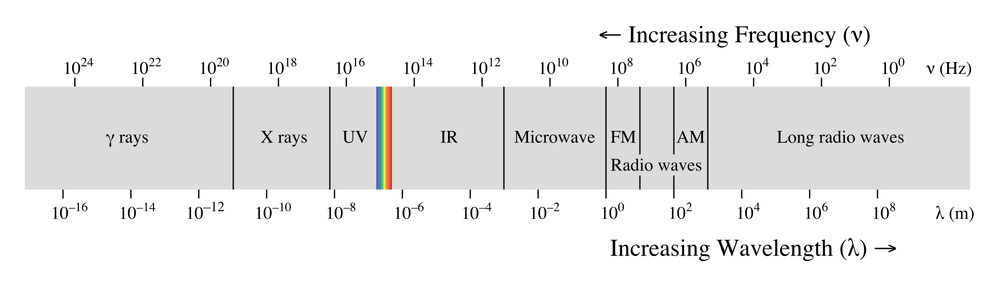

In [2]:
Image(path_files_raiosx('1000px-EM_spectrum_mod.png'))

## Escalas de comprimento

| Comprimento (m)| Comprimento (nanometro) | Tipo | Descrição |
| --- | --- | --- | --- |
| $10^{-11}\,\texttt{m}$ | $0.01\,\texttt{nm}$ (10 picômetros) | *hard* | Raio de alguns poucos átomos, como o hélio |
| $10^{-10}\,\texttt{m}$ | $0.1\,\texttt{nm}$ ($1$ ångström)| *hard* |Raio típico de átomos em geral e de ligações atômicas |
| $10^{-9}\,\texttt{m}$ | $1\,\texttt{nm}$ | *soft* | Diâmetro de uma hélice de DNA |
| $10^{8}\,\texttt{m}$ | $10\,\texttt{nm}$ | *soft* | Espessura de uma membrana celular |

Raios X *hard* são parcialmente absorvidos pelo corpo humano e, por isso, são apropriados para distinguir as diferentes densidades correspondentes a diferentes partes do corpo.

Raios X *soft* são completamente absorvidos pelo corpo humano e são indesejáveis em aplicações médicas.


## Interação com a matéria

O raio X interage com a mátéria de três formas:

- fotoabsorção (efeito fotoelétrico, principal efeito em raios x *soft* e nos raios x *hard* de menor energia)
- espalhamento de Compton (principal efeito nos raios x *hard* de maior energia)
- espalhamento de Rayleigh (e.g. azul do céu e alaranjado do pôr-do-sol)

No corpo humano:
- A interação é proporcional ao número atômico dos elementos que formam um material
- a pele e os órgãos absorvem muito pouco
- Materiais mais densos, como o osso, absorvem bastante

## Diferentes comprimentos de onda e suas aplicações

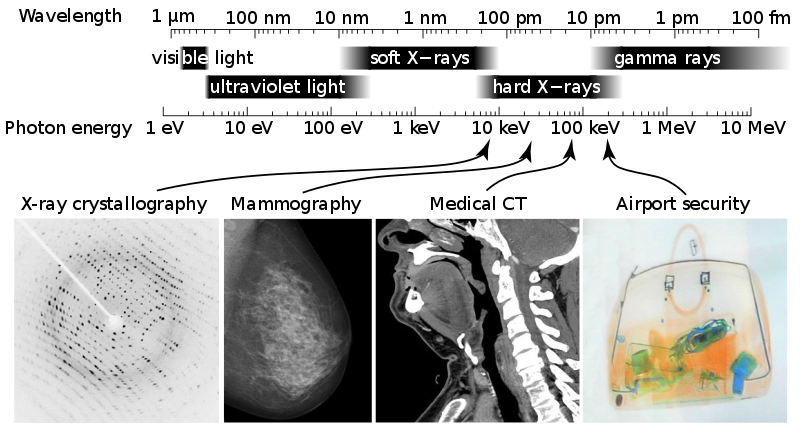

In [3]:
Image(path_files_raiosx('800px-X-ray_applications.svg.png'))

## Chapas de raio X

Em chapas/filmes/negativos de raio X:

- Os raios X que atravessam o corpo interagem com um filme composto de algum material terroso como tungstato de cálcio

- A emulsão está presente nos dois lados do filme, pois apenas 0,5% dos raios X interagem com a emulsão de forma que isso aumenta a interação para 1%. O restante atravessa o filme.

- A reação entre o raio X e a emulsão embranquece o filme, de forma que a parte escura representa uma maior presença de matéria macia (pele e órgãos) e a parte clara indica a presença de matéria óssea.

## Transformada de Radon

A transformada de Radon é utilizada para modelar a imagem formada em uma chapa de raio X pelo feixe que atravessa um certo corpo ou material.

Se $f(x,y)$ indica uma função de densidade de um corpo ocupando uma região bidimensional limitada $(x,y)\in \Omega\subset \mathbb{R}^2$, com $f=0$ no complementar, então a **transformada de Radon** de f é uma função que leva qualquer reta $L$ em $\mathbb{R}^2$ no valor da integral de linha

$$ Rf(L) = \int_L f(\mathbf x) |\rm d \mathbf x|.
$$

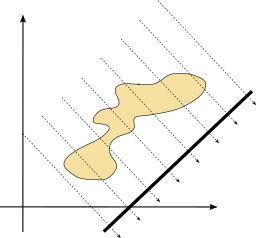

In [4]:
Image(path_files_raiosx('radon_transform.png'))

## Intepretação da transformada de Radon

A quantidade $Rf(L)$ está diretamente ligada à quantidade de raios X absorvida pelo feixe que atravessa o corpo na direção da reta $L$, que por sua vez está diretamente ligada à escala de cinza gerada na imagem.

Quanto mais raio X absorvido, mais clara será a imagem localizada em torno do ponto em que o feixe $L$ intercepta o plano do filme.

## Transformada de Radon em termos de uma parametrização das retas

Em $\mathbb{R}^2$, cada reta $L$ pode ser parametrizada da forma $\sigma(s) = (x(s), y(s))$ pela distância $t$ da reta à origem e pelo ângulo $\theta$ normal à reta, no sentido da origem à reta:

$$ \begin{cases}
  x(s) = t\cos\theta - s\sin\theta, \\
  y(s) = t\sin\theta + s\cos\theta.
\end{cases}
$$
Essa é uma parametrização pelo comprimento de arco. Assim,

$$ Rf(t,\theta) = \int_{-\infty}^\infty f(t\cos\theta - s\sin\theta, t\sin\theta + s\cos\theta) \;\rm d s
$$

## Exemplo de função densidade

In [5]:
def f(x,y):
    f = np.where(x**2<=1, 1, 0)
    f += sum([np.where(x**6+(y-j)**6<=0.2, 8, 0) for j in [-2, 0, 2]])
    f += sum([np.where(x**4+500*(y-j)**4<=0.4, 2, 0) for j in [-3, -1, 1, 3]])
    return f
        

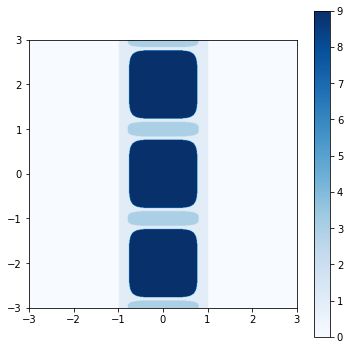

In [6]:
x = y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.figure(figsize=(6,6))
im = plt.imshow(Z, interpolation='bilinear', cmap=plt.cm.Blues,
               origin='lower', extent=[-3.0, 3.0, -3.0, 3.0],
               vmin=Z.min(), vmax=Z.max())
plt.colorbar(im)

plt.show()

## Transformada de Radon da função de exemplo


In [7]:
def Radon(f):
    @np.vectorize
    def radon_f(t,theta):
        g = lambda s: f(t*np.cos(theta) - s*np.sin(theta), t*np.sin(theta) + s*np.cos(theta))
        return quad(g, -np.inf, np.inf, epsabs=1.49e-04)[0] 
    return radon_f
print(type(Radon))

<class 'function'>


In [8]:
g = Radon(f)

theta = np.pi/2
raio_x_fatia = lambda t: g(t,theta)

t = np.arange(-3.0, 3.0, 0.04)
raio_x_imagem = raio_x_fatia(t)
print(type(raio_x_imagem))

<class 'numpy.ndarray'>


## Gráfico da transformada

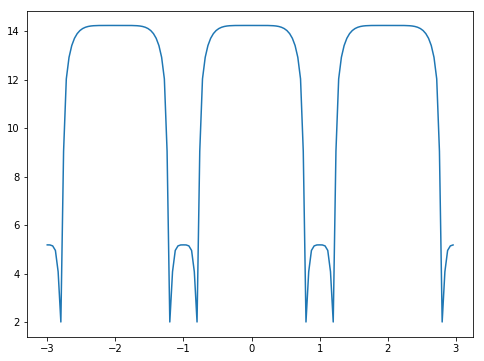

In [9]:
plt.figure(figsize=(8,6))
plt.plot(t, raio_x_imagem)
plt.show()

## Visualização do raio X

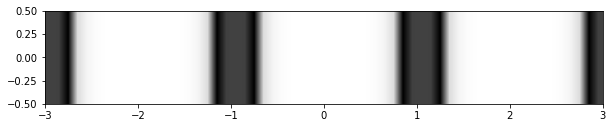

In [11]:
t = np.arange(-3.0, 3.0, 0.1)
w = np.arange(-0.5, 0.5, 0.2)

T, W = np.meshgrid(t,w)
R = raio_x_fatia(T)

plt.figure(figsize=(10,2))
im = plt.imshow(R, interpolation='bilinear', cmap=plt.cm.gray,
               origin='lower', extent=[-3.0, 3.0, -0.5, 0.5],
               vmin=R.min(), vmax=R.max())
plt.show()

## Generalizações

- Integração sobre hiperplanos em $\mathbb{R}^n$ (transformada de Radon n-dimensional)

- Integração ao longo de retas em $\mathbb{R}^n$ (transformada de raio X)

- Integração ao longo de variedades lineares de dimensão $1<k<n$ em $\mathbb{R}^n$.

## Exercícios

1. Implemente uma versão tridimensional $R_zf(x,y)$ da transformada de raio X, ao longo de retas paralelas ao eixo $z$ e passando por pontos $(x,y,0)$ no plano $xy$.

1. Use a implementação acima para visualizar o "raio X" através de um corpo $\Omega\subset\mathbb{R}^3$ com densidade

$$ f(x,y,z) = \chi_{B_1}(x,y,z) - 0.2\chi_{B_2}(x,y,z),
$$
onde
$$ B_1 = B_1(0,0,0) = \text{ bola unitária centrada na origem,}
$$
$$ B_2 = B_{1/8}(1/4, 1/4, 1/4) = \text{ bola de raio 1/8 centrada em (1/4, 1/4, 1/4)}
$$
e
$$ \chi_B(x,y,z) = \text{ função característica de um conjunto $B$} 
      = \begin{cases}
        1, & (x,y,z)\in B, \\
        0, & (x,y,z)\notin B.
      \end{cases}.
$$

---

### Apresentação em slides

In [12]:
!jupyter nbconvert 18.00-Aula18.ipynb --to slides --SlidesExporter.reveal_scroll=True --template output_toggle.tpl

[NbConvertApp] Converting notebook 18.00-Aula18.ipynb to slides
[NbConvertApp] Writing 742717 bytes to 18.00-Aula18.slides.html


<!--NAVIGATOR-->

---
[<- Aula 17: Séries e transformada de Fourier, algumas aplicações](17.00-Aula17.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 19: Inversão da transformada de Radon e recuperação de imagens ->](19.00-Aula19.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/18.00-Aula18.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/18.00-Aula18.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/18.00-Aula18.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;